<a href="https://colab.research.google.com/github/MarcoBenedictus/Sistem-AdClick-Prediction/blob/main/NIM_MarcoBenedictusT_ProjectSIC_Ad%20Click%20Prediction%20Dataset.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Tentukan path file dataset Anda
file_path = 'ad_click_dataset.csv'

# Memuat dataset dari file CSV
try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' berhasil dimuat.")
    print(f"Dimensi dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    df = None
except Exception as e:
    print(f"Error lain saat memuat dataset: {e}")
    df = None

# Menampilkan 5 baris pertama jika berhasil dimuat
if df is not None:
    print("\n5 Baris Pertama Dataset:")
    pd.set_option('display.max_columns', None)  # agar semua kolom terlihat
    print(df.head())


Dataset 'ad_click_dataset.csv' berhasil dimuat.
Dimensi dataset: 10000 baris, 9 kolom

5 Baris Pertama Dataset:
     id full_name   age      gender device_type ad_position browsing_history  \
0   670   User670  22.0         NaN     Desktop         Top         Shopping   
1  3044  User3044   NaN        Male     Desktop         Top              NaN   
2  5912  User5912  41.0  Non-Binary         NaN        Side        Education   
3  5418  User5418  34.0        Male         NaN         NaN    Entertainment   
4  9452  User9452  39.0  Non-Binary         NaN         NaN     Social Media   

  time_of_day  click  
0   Afternoon      1  
1         NaN      1  
2       Night      1  
3     Evening      1  
4     Morning      0  


In [28]:
if df is not None:
    # Menampilkan informasi dasar: tipe data, jumlah non-null, dan penggunaan memori
    print("\nInformasi Dasar Dataset (df.info()):")
    df.info()
else:
    print("Dataset belum dimuat.")


Informasi Dasar Dataset (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [29]:
if df is not None:
    # Menampilkan statistik deskriptif untuk kolom numerik
    print("\nStatistik Deskriptif (Numerik):")
    print(df.describe().T)  # .T untuk transpose agar hasil lebih vertikal

    # Menampilkan statistik deskriptif untuk kolom object / kategorikal
    print("\nStatistik Deskriptif (Kategorikal / Object):")
    print(df.describe(include=['object', 'category']).T)
else:
    print("Dataset belum dimuat.")


Statistik Deskriptif (Numerik):
         count         mean          std   min     25%     50%     75%  \
id     10000.0  5060.211400  2861.758265   5.0  2529.0  5218.0  7466.0   
age     5234.0    40.197363    13.126420  18.0    29.0    39.5    52.0   
click  10000.0     0.650000     0.476993   0.0     0.0     1.0     1.0   

           max  
id     10000.0  
age       64.0  
click      1.0  

Statistik Deskriptif (Kategorikal / Object):
                  count unique            top  freq
full_name         10000   4000       User1171    25
gender             5307      3         Female  1834
device_type        8000      3        Desktop  2754
ad_position        8000      3         Bottom  2817
browsing_history   5218      5  Entertainment  1175
time_of_day        8000      4        Morning  2126


In [30]:
if df is not None:
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("\nTidak ditemukan nilai hilang dalam dataset.")
    else:
        missing_percentage = (missing_values / len(df)) * 100
        missing_info = pd.DataFrame({
            'Jumlah Hilang': missing_values,
            'Persentase Hilang': missing_percentage
        })
        print("\nInformasi Nilai Hilang:")
        print(missing_info[missing_info['Jumlah Hilang'] > 0].sort_values(
            by='Persentase Hilang', ascending=False))
else:
    print("Dataset belum dimuat.")


Informasi Nilai Hilang:
                  Jumlah Hilang  Persentase Hilang
browsing_history           4782              47.82
age                        4766              47.66
gender                     4693              46.93
device_type                2000              20.00
ad_position                2000              20.00
time_of_day                2000              20.00



Membuat histogram untuk fitur numerik ...


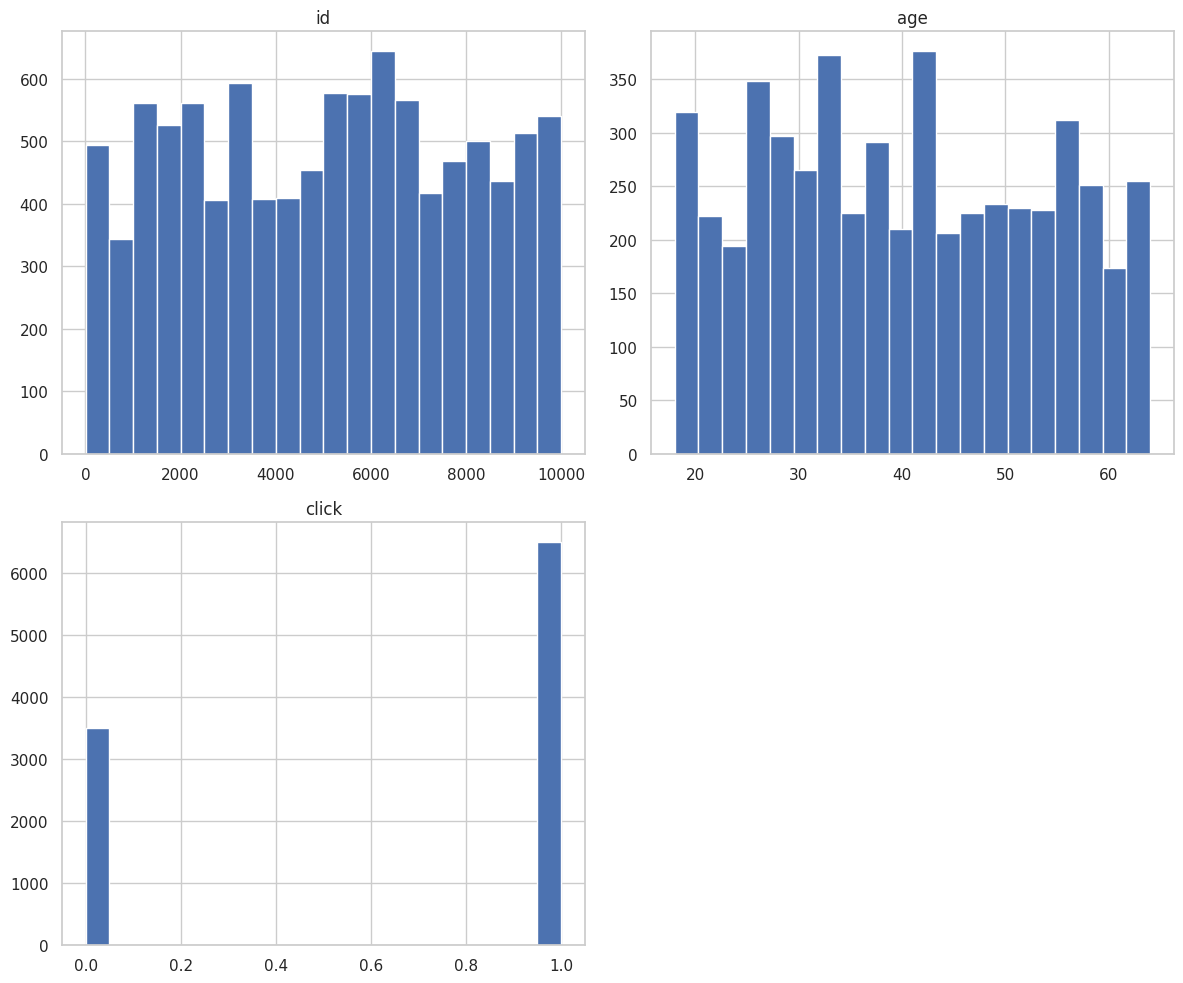

In [31]:
if df is not None:
    try:
        print("\nMembuat histogram untuk fitur numerik ...")
        df.hist(figsize=(12, 10), bins=20)  # bins disesuaikan
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Gagal membuat histogram: {e}")
else:
    print("Dataset belum dimuat.")


Membuat countplot untuk fitur kategorikal ...


<ipython-input-32-4851bf6109dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)],


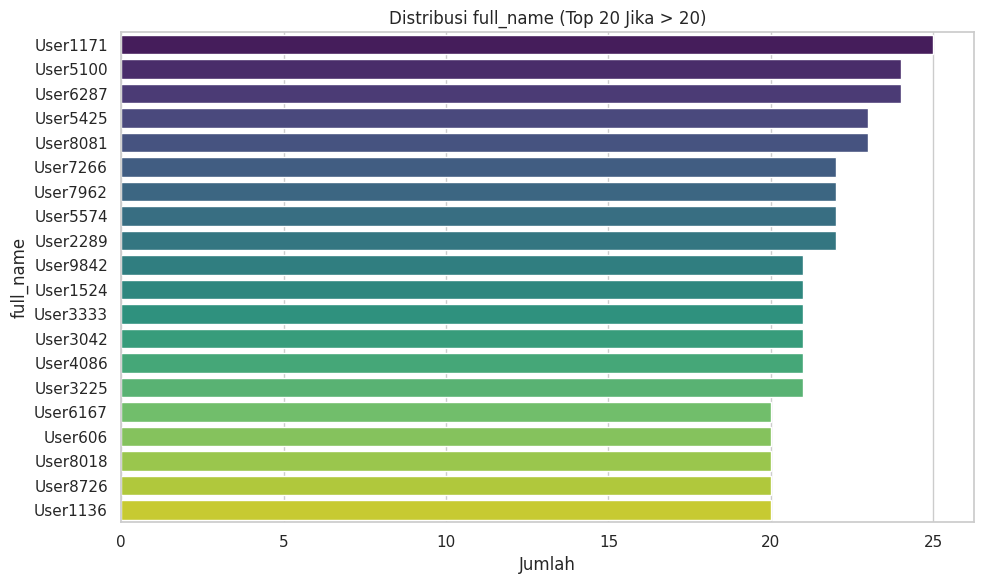

<ipython-input-32-4851bf6109dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)],


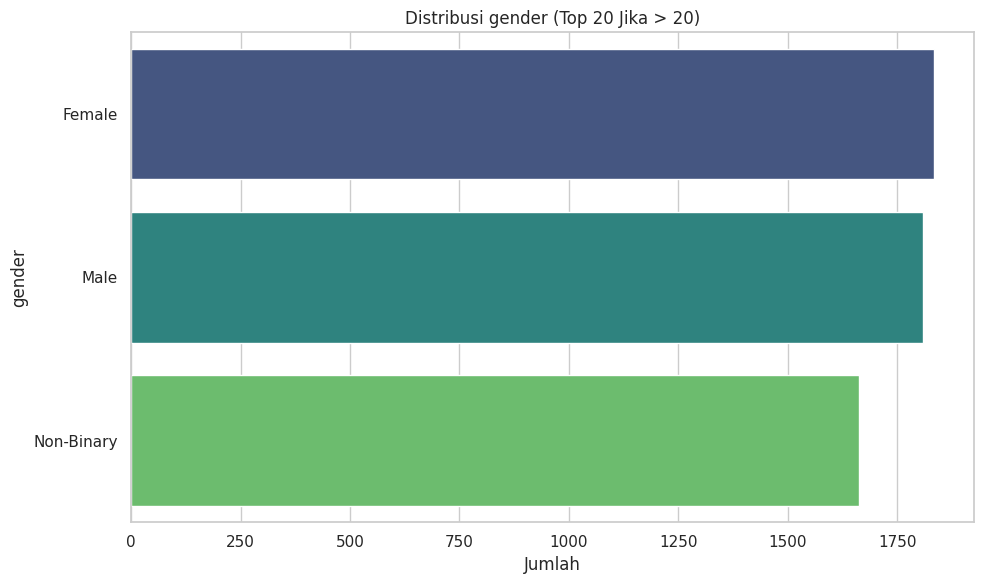

<ipython-input-32-4851bf6109dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)],


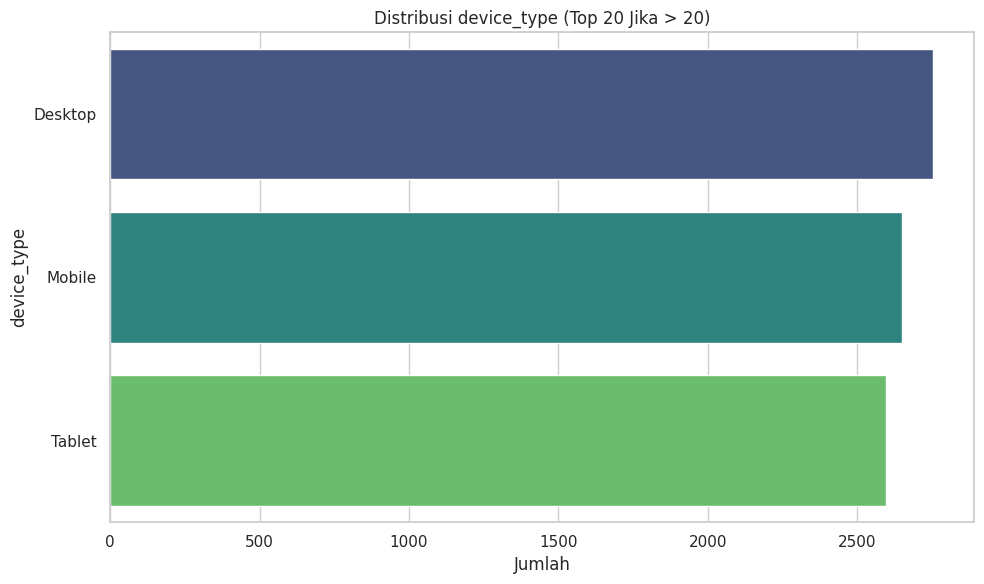

<ipython-input-32-4851bf6109dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)],


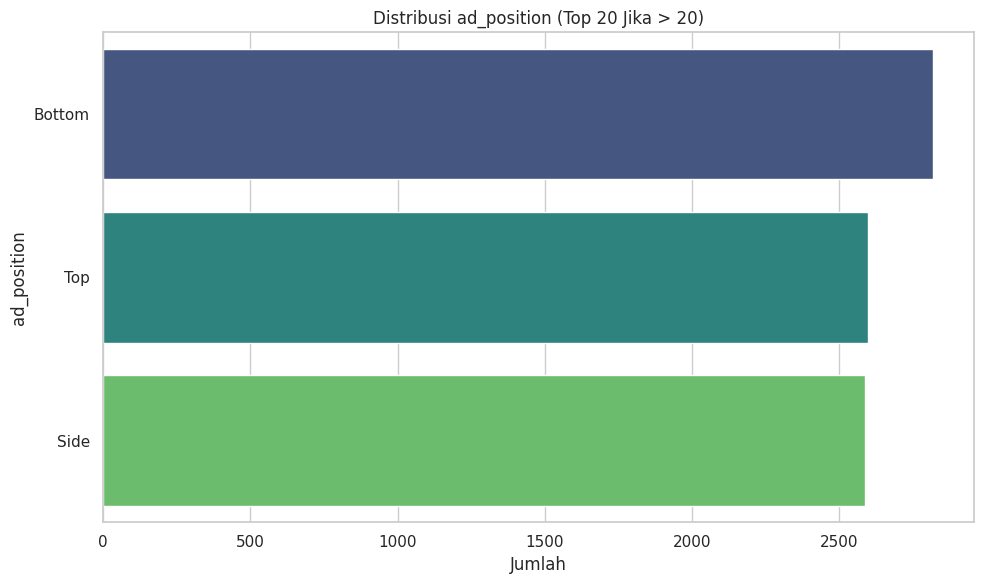

<ipython-input-32-4851bf6109dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)],


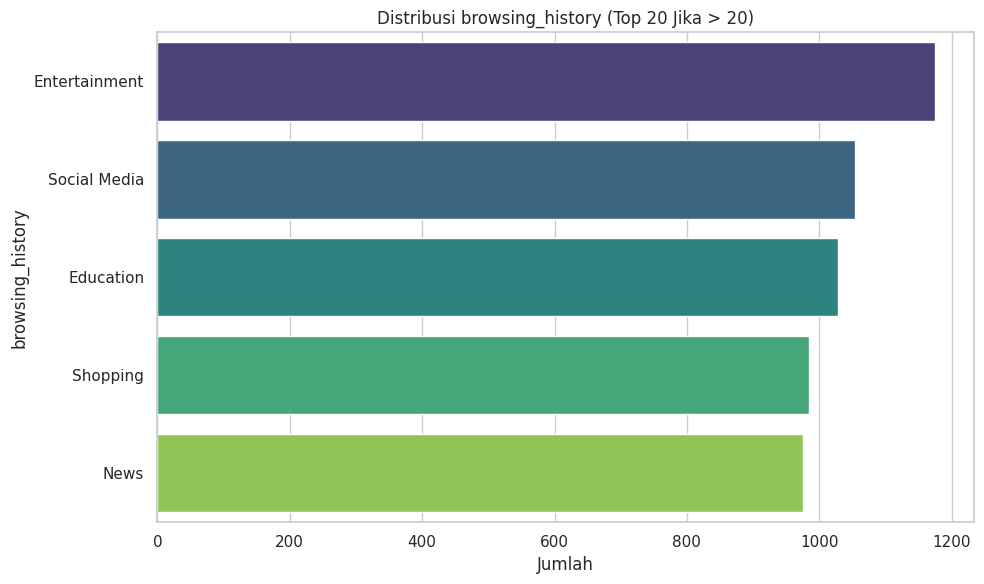

<ipython-input-32-4851bf6109dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)],


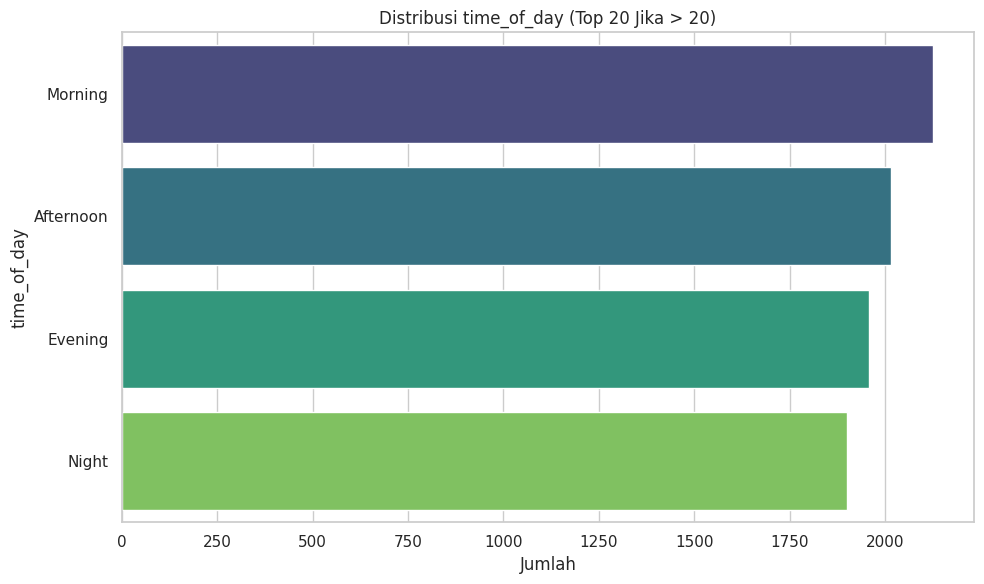

In [32]:
if df is not None:
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nMembuat countplot untuk fitur kategorikal ...")

    for column in categorical_cols:
        try:
            plt.figure(figsize=(10, 6))  # Sesuaikan ukuran jika perlu
            # Mengambil 20 kategori teratas jika > 20 agar plot tidak terlalu ramai
            top_categories = df[column].value_counts().nlargest(20).index
            sns.countplot(data=df[df[column].isin(top_categories)],
                          y=column,
                          order=top_categories,
                          palette='viridis')
            plt.title(f'Distribusi {column} (Top 20 Jika > 20)')
            plt.xlabel('Jumlah')
            plt.ylabel(column)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Gagal membuat countplot untuk {column}: {e}")
else:
    print("Dataset belum dimuat.")


Membuat visualisasi hubungan dengan variabel target ...


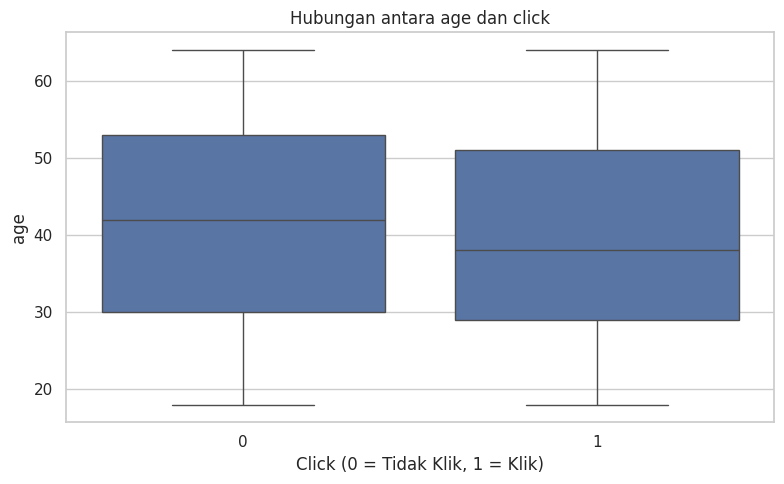

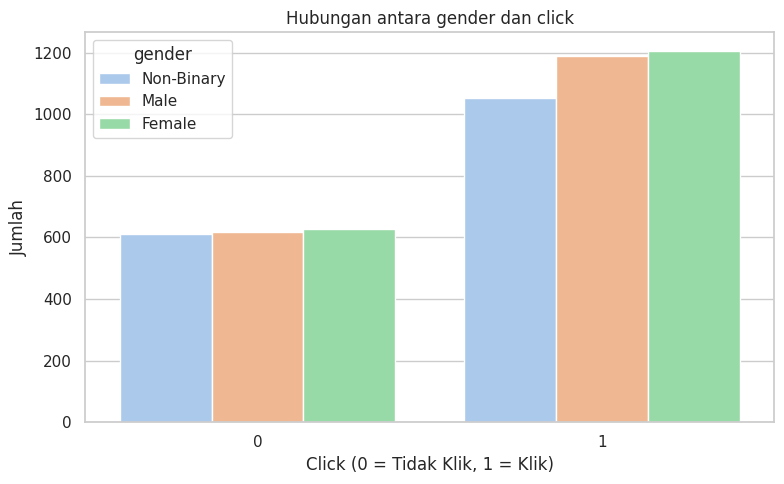

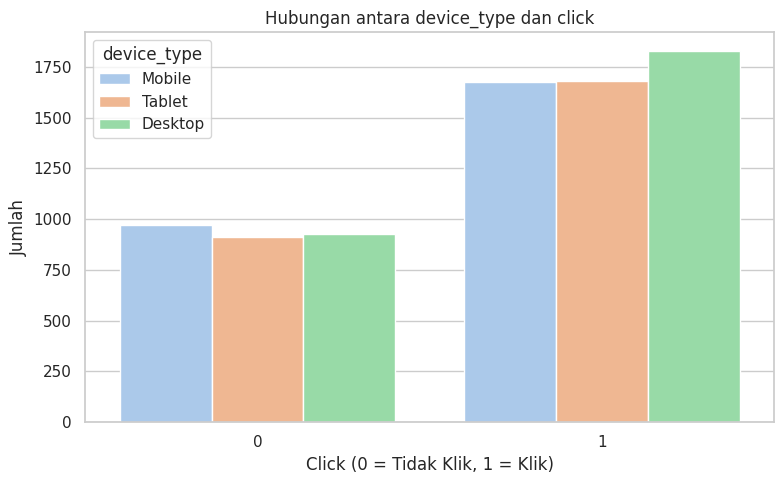

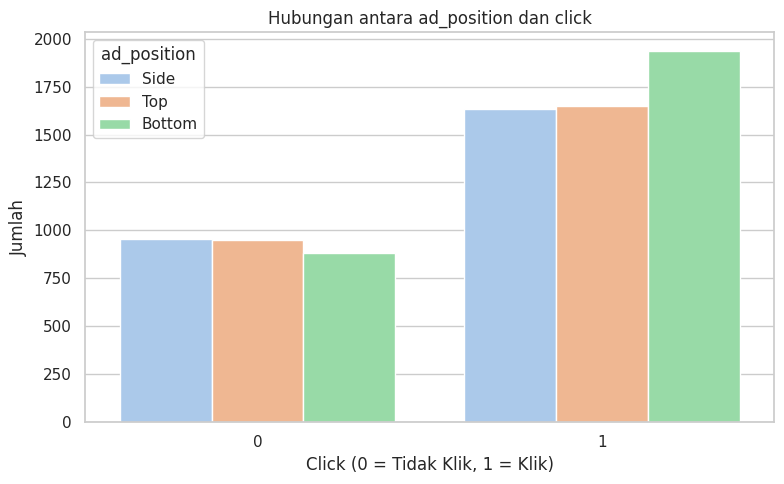

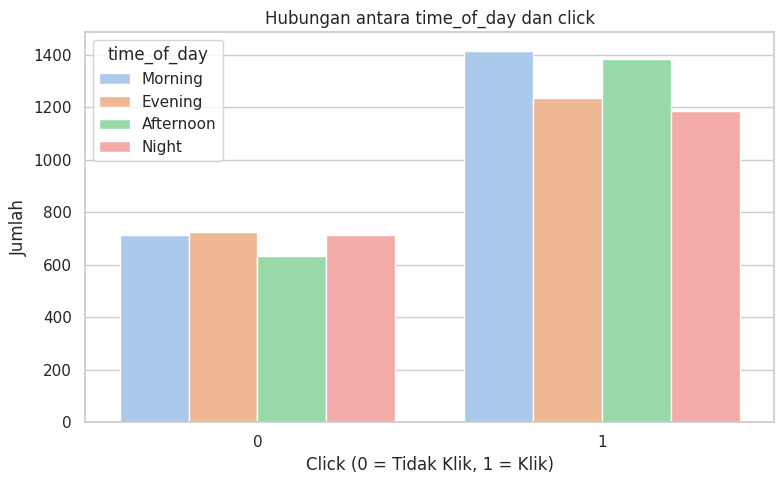

In [33]:
if df is not None and 'click' in df.columns:
    print("\nMembuat visualisasi hubungan dengan variabel target ...")

    numerical_to_plot = ['age']
    for col in numerical_to_plot:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(data=df, x='click', y=col)
            plt.title(f'Hubungan antara {col} dan click')
            plt.xlabel('Click (0 = Tidak Klik, 1 = Klik)')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

    categorical_to_plot = ['gender', 'device_type', 'ad_position', 'time_of_day']
    for col in categorical_to_plot:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.countplot(data=df, x='click', hue=col, palette='pastel')
            plt.title(f'Hubungan antara {col} dan click')
            plt.xlabel('Click (0 = Tidak Klik, 1 = Klik)')
            plt.ylabel('Jumlah')
            plt.tight_layout()
            plt.show()
else:
    print("Dataset belum dimuat atau kolom 'click' tidak ada.")

In [34]:
if df is not None and 'age' in df.columns:
    # Coba konversi ke numerik, paksa error menjadi NaN
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Cek apakah ada NaN yang muncul setelah konversi
    if df['age'].isnull().sum() > 0:
        print("Peringatan: Ada nilai non-numerik di 'age', menghasilkan NaN.")
        # Imputasi menggunakan median
        median_fs = df['age'].median()
        df['age'].fillna(median_fs, inplace=True)
        print(f"NaN di 'age' diimputasi dengan median: {median_fs}")
    else:
        print("Kolom 'age' berhasil dikonversi ke numerik.")

    # Verifikasi tipe data baru
    print(f"Tipe data baru 'age': {df['age'].dtype}")
else:
    print("Dataset atau kolom 'age' tidak ditemukan.")

Peringatan: Ada nilai non-numerik di 'age', menghasilkan NaN.
NaN di 'age' diimputasi dengan median: 39.5
Tipe data baru 'age': float64


<ipython-input-34-7c8ee8c25d27>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_fs, inplace=True)


In [35]:
if df is not None:
    print("\n--- Memulai Encoding Variabel Kategorikal ---")

    # Identifikasi kolom kategorikal (tipe 'object' atau 'category')
    categorical_cols_to_encode = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Hapus kolom 'id' jika tidak relevan
    if 'id' in categorical_cols_to_encode:
        categorical_cols_to_encode.remove('id')

    if categorical_cols_to_encode:
        print(f"Kolom kategorikal yang akan di-encode: {categorical_cols_to_encode}")

        # Terapkan One-Hot Encoding
        df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True, dtype=int)

        # Hapus kolom 'id' jika masih ada
        if 'id' in df_encoded.columns:
            df_encoded = df_encoded.drop('id', axis=1)
            print("Kolom 'id' telah dihapus.")

        print(f"\nDimensi dataset setelah One-Hot Encoding: {df_encoded.shape}")
        print("Contoh beberapa nama kolom baru:")
        print(df_encoded.columns[:15].tolist(), "...")
    else:
        print("Tidak ada kolom kategorikal yang perlu di-encode.")
        df_encoded = df.copy()
        if 'id' in df_encoded.columns:
            df_encoded = df_encoded.drop('id', axis=1)
            print("Kolom 'id' telah dihapus.")
else:
    print("Dataframe 'df' tidak tersedia.")
    df_encoded = None



--- Memulai Encoding Variabel Kategorikal ---
Kolom kategorikal yang akan di-encode: ['full_name', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
Kolom 'id' telah dihapus.

Dimensi dataset setelah One-Hot Encoding: (10000, 4014)
Contoh beberapa nama kolom baru:
['age', 'click', 'full_name_User100', 'full_name_User1000', 'full_name_User10000', 'full_name_User1001', 'full_name_User1002', 'full_name_User1011', 'full_name_User1012', 'full_name_User1014', 'full_name_User1017', 'full_name_User1019', 'full_name_User1020', 'full_name_User1021', 'full_name_User1027'] ...


In [36]:
from sklearn.preprocessing import MinMaxScaler

if 'df_encoded' in locals() and df_encoded is not None:
    print("\n--- Memulai Scaling Fitur Numerik ---")

    # Identifikasi fitur numerik yang akan di-scale
    original_numerical_cols = ['age']

    # Hindari scaling kolom target
    if 'click' in original_numerical_cols:
        original_numerical_cols.remove('click')

    # Pilih kolom numerik yang masih ada setelah encoding
    numerical_features_to_scale = [col for col in original_numerical_cols if col in df_encoded.columns]

    if numerical_features_to_scale:
        print(f"Fitur numerik yang akan di-scale: {numerical_features_to_scale}")
        scaler = MinMaxScaler()
        df_scaled = df_encoded.copy()
        df_scaled[numerical_features_to_scale] = scaler.fit_transform(df_scaled[numerical_features_to_scale])

        print("\nContoh data setelah normalisasi (fitur numerik yang di-scale):")
        display(df_scaled[numerical_features_to_scale].head())

        print("\nStatistik deskriptif setelah scaling (cek min/max):")
        display(df_scaled[numerical_features_to_scale].describe().T)
    else:
        print("Tidak ada fitur numerik yang perlu di-scale.")
        df_scaled = df_encoded.copy()
else:
    print("Dataframe 'df_encoded' tidak tersedia.")
    df_scaled = None



--- Memulai Scaling Fitur Numerik ---
Fitur numerik yang akan di-scale: ['age']

Contoh data setelah normalisasi (fitur numerik yang di-scale):


,age
0,0.086957
1,0.467391
2,0.500000
3,0.347826
4,0.456522



Statistik deskriptif setelah scaling (cek min/max):


,count,mean,std,min,25%,50%,75%,max
age,10000.0,0.475326,0.206575,0.0,0.434783,0.467391,0.478261,1.0


In [37]:
from sklearn.model_selection import train_test_split

if 'df_scaled' in locals() and df_scaled is not None and 'click' in df_scaled.columns:
    print("\n--- Memulai Pembagian Dataset (Train - Test Split) ---")

    target_column = 'click'
    X = df_scaled.drop(target_column, axis=1)
    y = df_scaled[target_column]

    print(f"Ukuran Fitur (X) sebelum split: {X.shape}")
    print(f"Ukuran Target (y) sebelum split: {y.shape}")

    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,         # 20% untuk test set
            random_state=42,       # Untuk reproduktibilitas
            stratify=y             # Menjaga proporsi kelas target
        )

        print("\nUkuran dataset setelah dibagi:")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")

        print("\nProporsi target di y_train:")
        print(y_train.value_counts(normalize=True).map("{:.2%}".format))

        print("\nProporsi target di y_test:")
        print(y_test.value_counts(normalize=True).map("{:.2%}".format))

        print("\nDataset siap untuk tahap pemodelan!")

    except Exception as e:
        print(f"\nError saat membagi dataset: {e}")
else:
    print("Dataframe 'df_scaled' atau kolom target 'click' tidak tersedia.")



--- Memulai Pembagian Dataset (Train - Test Split) ---
Ukuran Fitur (X) sebelum split: (10000, 4013)
Ukuran Target (y) sebelum split: (10000,)

Ukuran dataset setelah dibagi:
X_train shape: (8000, 4013)
X_test shape: (2000, 4013)
y_train shape: (8000,)
y_test shape: (2000,)

Proporsi target di y_train:
click
1    65.00%
0    35.00%
Name: proportion, dtype: object

Proporsi target di y_test:
click
1    65.00%
0    35.00%
Name: proportion, dtype: object

Dataset siap untuk tahap pemodelan!
